           Model  Accuracy  Precision    Recall
0  Decision Tree  0.821229   0.793651  0.724638
1  Random Forest  0.821229   0.813559  0.695652


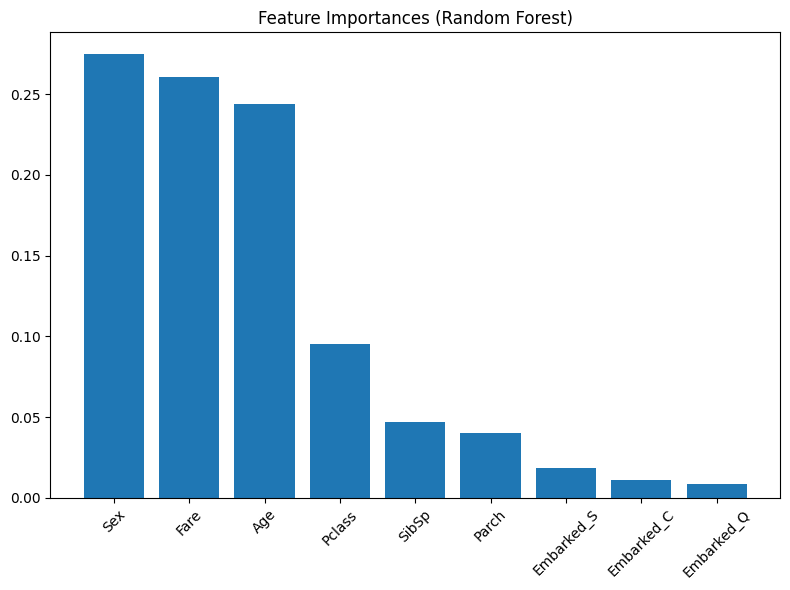

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt

# 1. Load cleaned dataset
titanic = pd.read_csv('train.csv')

# 2. Features and target
target = 'Survived'
features = [col for col in titanic.columns if col != target]
X = titanic[features]
y = titanic[target]

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# 5. Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 6. Evaluate models
metrics = {
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_rf)],
    'Recall': [recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_rf)]
}
results_df = pd.DataFrame(metrics)
print(results_df)

# 7. Feature importances from Random Forest
importances = rf.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(8,6))
plt.title('Feature Importances (Random Forest)')
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()